In [121]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib.image as mpimg
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import mean_squared_error as mse
from numpy import zeros, newaxis
import random
random.seed(30)

In [122]:
GS=os.listdir("F:\\IIT KANPUR MTECH STUDY MATERIAL\\THESIS\\Data  of Dyslexic and Non Dyslexic Children in Hindi\\For Image Augmen\\Preview") # Geometerical similar
#GS.remove('.DS_Store')
PRI=pd.read_excel("F:\\IIT KANPUR MTECH STUDY MATERIAL\\THESIS\\Data  of Dyslexic and Non Dyslexic Children in Hindi\\PRI.xlsx")
#PRI=pd.read_excel("F:\\IIT KANPUR MTECH STUDY MATERIAL\\THESIS\\Data  of Dyslexic and Non Dyslexic Children in Hindi\\VCI.xlsx")
PRI=PRI.values
A=PRI[:,1].astype(int)
ids=PRI[:,0].astype(str)
y=np.log10(A)

In [123]:
address="F:\\IIT KANPUR MTECH STUDY MATERIAL\\THESIS\\Data  of Dyslexic and Non Dyslexic Children in Hindi\\For Image Augmen\\Preview"
Train=[]
Test=[]
Label=[]
for i in GS:
    word_add=address+'\\'+i
    words=os.listdir(word_add)
    for j in words:
        img=cv2.imread(word_add+'\\'+j,cv2.IMREAD_GRAYSCALE)
        #print(img)
        #imgplot = plt.imshow(img)
        if j[:6] in ids:
            r=np.where(PRI==j[:6])[0]
            #print(True)
            Train.append(i+'\\'+j)
            Label.append(y[r[0]])
        else:
            print(j)
            Test.append(i+'\\'+j)

272DM (2).jpeg
272DM (3).jpeg
272DM (4).jpeg
272DM (5).jpeg
272DM.jpeg
AS3SM (2).jpg
J4SM (2).jpg
282DM (7).jpg
282DM (9).jpg
282DM.jpg
282DM_0_2135.jpeg
282DM_0_2224.jpeg
282DM_0_2334.jpeg
282DM_0_3001.jpeg
282DM_0_3548.jpeg
282DM_0_4412.jpeg
282DM_0_541.jpeg
282DM_0_5507.jpeg
282DM_0_5784.jpeg
282DM_0_6252.jpeg
282DM_0_8306.jpeg
282DM_0_8425.jpeg
282DM_0_8664.jpeg
282DM_0_8713.jpeg
282DM_0_895.jpeg
2455DM.jpg
U5SM.jpg
otsu_GS_dys_1.jpg
P5SM (b) (2).jpg


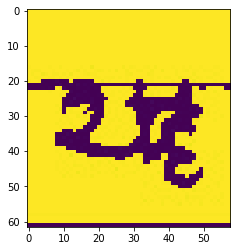

In [124]:
imgplot = plt.imshow(img)

In [125]:
GS

['baccha', 'bas', 'kya', 'likhkar', 'parivar', 'sabhi', 'us', 'vipreet', 'yah']

In [126]:
len(Label)

99

In [127]:
# Arranging test data
Xtest=[]
for i in range(len(Test)):
    j=Test[i]
    img=cv2.imread(address+'\\'+j,cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(img, (30, 410), interpolation=cv2.INTER_NEAREST)
    resized_image=resized_image/255  
    Xtest.append(resized_image)
    
Xtest=np.array(Xtest)
Xtest= Xtest[..., newaxis]
print(Xtest.shape)
print(address+'\\'+j)
print(Test)


(29, 410, 30, 1)
F:\IIT KANPUR MTECH STUDY MATERIAL\THESIS\Data  of Dyslexic and Non Dyslexic Children in Hindi\For Image Augmen\Preview\vipreet\P5SM (b) (2).jpg
['bas\\272DM (2).jpeg', 'bas\\272DM (3).jpeg', 'bas\\272DM (4).jpeg', 'bas\\272DM (5).jpeg', 'bas\\272DM.jpeg', 'likhkar\\AS3SM (2).jpg', 'likhkar\\J4SM (2).jpg', 'sabhi\\282DM (7).jpg', 'sabhi\\282DM (9).jpg', 'sabhi\\282DM.jpg', 'sabhi\\282DM_0_2135.jpeg', 'sabhi\\282DM_0_2224.jpeg', 'sabhi\\282DM_0_2334.jpeg', 'sabhi\\282DM_0_3001.jpeg', 'sabhi\\282DM_0_3548.jpeg', 'sabhi\\282DM_0_4412.jpeg', 'sabhi\\282DM_0_541.jpeg', 'sabhi\\282DM_0_5507.jpeg', 'sabhi\\282DM_0_5784.jpeg', 'sabhi\\282DM_0_6252.jpeg', 'sabhi\\282DM_0_8306.jpeg', 'sabhi\\282DM_0_8425.jpeg', 'sabhi\\282DM_0_8664.jpeg', 'sabhi\\282DM_0_8713.jpeg', 'sabhi\\282DM_0_895.jpeg', 'us\\2455DM.jpg', 'us\\U5SM.jpg', 'vipreet\\otsu_GS_dys_1.jpg', 'vipreet\\P5SM (b) (2).jpg']


In [128]:
X=[]
for i in range(len(Train)):
    j=Train[i]
    img=cv2.imread(address+'\\'+j,cv2.IMREAD_GRAYSCALE)
    print(address+'\\'+j)
    resized_image = cv2.resize(img, (30, 410), interpolation=cv2.INTER_NEAREST)
    resized_image=resized_image/255  
    X.append(resized_image)
    
X=np.array(X)
#without Augmentation
#Xtrain=X[:20,:,:]
#X_val=X[20:,:,:]
#Ytrain=Label[:20]
#Y_val=Label[20:]
#With Augmentation
Xtrain=X[:90,:,:]
X_val=X[90:,:,:]
Ytrain=Label[:90]
Y_val=Label[90:]
######
Ytrain=np.reshape(Ytrain,(len(Ytrain),1))
Y_val=np.reshape(Y_val,(len(Y_val),1))
Xtrain= Xtrain[..., newaxis]
X_val=X_val[..., newaxis]
#print(Xtrain.shape, X_val.shape)


F:\IIT KANPUR MTECH STUDY MATERIAL\THESIS\Data  of Dyslexic and Non Dyslexic Children in Hindi\For Image Augmen\Preview\baccha\2202DM.jpg
F:\IIT KANPUR MTECH STUDY MATERIAL\THESIS\Data  of Dyslexic and Non Dyslexic Children in Hindi\For Image Augmen\Preview\baccha\2202DM.jpg (2).jpeg
F:\IIT KANPUR MTECH STUDY MATERIAL\THESIS\Data  of Dyslexic and Non Dyslexic Children in Hindi\For Image Augmen\Preview\baccha\2202DM.jpg (3).jpeg
F:\IIT KANPUR MTECH STUDY MATERIAL\THESIS\Data  of Dyslexic and Non Dyslexic Children in Hindi\For Image Augmen\Preview\baccha\2202DM.jpg (4).jpeg
F:\IIT KANPUR MTECH STUDY MATERIAL\THESIS\Data  of Dyslexic and Non Dyslexic Children in Hindi\For Image Augmen\Preview\baccha\2202DM.jpg (5).jpeg
F:\IIT KANPUR MTECH STUDY MATERIAL\THESIS\Data  of Dyslexic and Non Dyslexic Children in Hindi\For Image Augmen\Preview\baccha\2202DM.jpg.jpeg
F:\IIT KANPUR MTECH STUDY MATERIAL\THESIS\Data  of Dyslexic and Non Dyslexic Children in Hindi\For Image Augmen\Preview\bas\2152DF.

F:\IIT KANPUR MTECH STUDY MATERIAL\THESIS\Data  of Dyslexic and Non Dyslexic Children in Hindi\For Image Augmen\Preview\sabhi\2102DF_0_9824.jpeg
F:\IIT KANPUR MTECH STUDY MATERIAL\THESIS\Data  of Dyslexic and Non Dyslexic Children in Hindi\For Image Augmen\Preview\sabhi\2132DM.jpg
F:\IIT KANPUR MTECH STUDY MATERIAL\THESIS\Data  of Dyslexic and Non Dyslexic Children in Hindi\For Image Augmen\Preview\sabhi\2132DM_0_1951.jpeg
F:\IIT KANPUR MTECH STUDY MATERIAL\THESIS\Data  of Dyslexic and Non Dyslexic Children in Hindi\For Image Augmen\Preview\sabhi\2132DM_0_443.jpeg
F:\IIT KANPUR MTECH STUDY MATERIAL\THESIS\Data  of Dyslexic and Non Dyslexic Children in Hindi\For Image Augmen\Preview\sabhi\2132DM_0_5312.jpeg
F:\IIT KANPUR MTECH STUDY MATERIAL\THESIS\Data  of Dyslexic and Non Dyslexic Children in Hindi\For Image Augmen\Preview\sabhi\2132DM_0_5580.jpeg
F:\IIT KANPUR MTECH STUDY MATERIAL\THESIS\Data  of Dyslexic and Non Dyslexic Children in Hindi\For Image Augmen\Preview\sabhi\2132DM_0_7244

In [129]:
# Model
model = Sequential()
model.add(Conv2D(64, kernel_size=4,activation='relu', input_shape=(410,30,1)))
model.add(Conv2D(32, kernel_size=3, activation='linear'))
model.add(Flatten())
model.add(Dense(1, activation='linear'))
model.compile(loss='mse',optimizer='adam')
model_history=model.fit(Xtrain, Ytrain, batch_size=1, epochs=35, verbose=1, validation_data=(X_val, Y_val))

Train on 90 samples, validate on 9 samples
Epoch 1/35
90/90 [==============================] - 11s 121ms/step - loss: 16.7880 - val_loss: 0.5049
Epoch 2/35
90/90 [==============================] - 10s 115ms/step - loss: 4.8056 - val_loss: 0.2806
Epoch 3/35
90/90 [==============================] - 11s 124ms/step - loss: 0.5617 - val_loss: 0.3840
Epoch 4/35
90/90 [==============================] - 10s 116ms/step - loss: 0.1513 - val_loss: 0.0674
Epoch 5/35
90/90 [==============================] - 10s 116ms/step - loss: 0.0621 - val_loss: 0.0822
Epoch 6/35
90/90 [==============================] - 10s 115ms/step - loss: 0.0269 - val_loss: 0.1457
Epoch 7/35
90/90 [==============================] - 10s 111ms/step - loss: 0.0135 - val_loss: 0.1499
Epoch 8/35
90/90 [==============================] - 11s 119ms/step - loss: 0.0099 - val_loss: 0.1789
Epoch 9/35
90/90 [==============================] - 12s 129ms/step - loss: 0.0127 - val_loss: 0.1022
Epoch 10/35
90/90 [============================

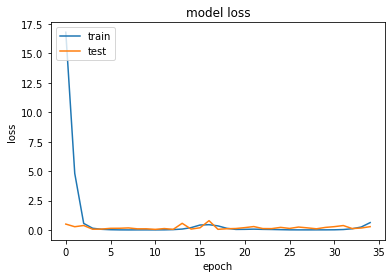

In [130]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Loss_vs_epochs.png')
plt.show()

In [131]:
# testing on Training data
prediction_train=model.predict(Xtrain)
print('mse ',mse(Ytrain,prediction_train))
print('\n')
print('Prediction \n',prediction_train)
print('\n')
print('Actual values \n', Ytrain)
print('\n')
Ytrain=10**Ytrain
prediction_train1=10**prediction_train
error_train=Ytrain-prediction_train1
print('Error',error_train)

mse  0.7217274327810901


Prediction 
 [[ 3.7731795 ]
 [ 1.6992013 ]
 [ 1.3813978 ]
 [ 2.6506045 ]
 [ 0.3375697 ]
 [ 2.0548651 ]
 [ 2.2353008 ]
 [ 1.9785548 ]
 [ 1.7062138 ]
 [ 1.9744388 ]
 [ 2.376273  ]
 [ 2.3269863 ]
 [ 2.428434  ]
 [ 0.9811329 ]
 [ 3.0748146 ]
 [ 2.5120447 ]
 [ 1.4853485 ]
 [ 2.778859  ]
 [ 1.295069  ]
 [ 0.56789786]
 [ 1.3975195 ]
 [ 2.6161985 ]
 [ 2.4701993 ]
 [ 2.9251184 ]
 [ 1.6676612 ]
 [ 2.2891648 ]
 [ 2.6485856 ]
 [ 1.2119894 ]
 [ 2.2483866 ]
 [ 2.4894054 ]
 [ 2.7787983 ]
 [ 2.0076714 ]
 [ 2.064216  ]
 [ 2.2905402 ]
 [ 1.0368896 ]
 [ 0.22874598]
 [ 3.212279  ]
 [ 2.040638  ]
 [ 1.1205181 ]
 [ 1.763814  ]
 [ 1.3579049 ]
 [ 0.41006637]
 [ 0.81258315]
 [ 1.3541968 ]
 [ 1.1719093 ]
 [ 1.7106862 ]
 [ 1.6431379 ]
 [ 1.3942337 ]
 [ 0.42005575]
 [-0.0463299 ]
 [-0.43429765]
 [ 1.0183693 ]
 [-0.4146959 ]
 [ 1.7396448 ]
 [ 1.8054689 ]
 [ 1.9573065 ]
 [ 2.1170056 ]
 [ 2.5176995 ]
 [ 0.3016896 ]
 [ 0.58255005]
 [-1.3406622 ]
 [ 0.94774234]
 [ 0.5894703 ]
 [-0.1781622 ]
 

In [132]:
# testing on Validation data

prediction_val=model.predict(X_val)
print('mse ',mse(Y_val,prediction_val))
print('\n')
print('Prediction \n',prediction_val)
print('\n')
print('Actual values \n', Y_val)
print('\n')
Y_val=10**Y_val
print('Power of 10',Y_val)
prediction_val1=10**prediction_val
print('Power of 10_Y_pred',prediction_val1)
#error=Y_val-prediction_val1
#print('Error',error)

mse  0.2872577286449568


Prediction 
 [[1.0739746 ]
 [0.9147968 ]
 [1.423986  ]
 [0.76647884]
 [1.2959495 ]
 [1.3193521 ]
 [1.7335113 ]
 [1.7762144 ]
 [1.7147176 ]]


Actual values 
 [[1.69897   ]
 [1.69897   ]
 [1.69897   ]
 [1.69897   ]
 [1.88649073]
 [1.69897   ]
 [1.39794001]
 [1.88649073]
 [1.84509804]]


Power of 10 [[50.]
 [50.]
 [50.]
 [50.]
 [77.]
 [50.]
 [25.]
 [77.]
 [70.]]
Power of 10_Y_pred [[11.856995 ]
 [ 8.218581 ]
 [26.545197 ]
 [ 5.8408875]
 [19.767395 ]
 [20.861818 ]
 [54.139137 ]
 [59.733006 ]
 [51.846283 ]]


In [133]:
prediction_test=model.predict(Xtest)
print('Prediction with log',prediction_test)
print('\n')
prediction_test1=10**prediction_test
print('Prediction without log',prediction_test1)


Prediction with log [[1.3731574 ]
 [1.2278378 ]
 [1.2630671 ]
 [0.8023749 ]
 [1.5029502 ]
 [1.5232348 ]
 [2.362571  ]
 [1.8396966 ]
 [1.3415483 ]
 [1.5740174 ]
 [1.5456696 ]
 [1.3608584 ]
 [1.7482663 ]
 [1.1529169 ]
 [1.5211132 ]
 [0.9876977 ]
 [1.5328847 ]
 [1.8659453 ]
 [1.8251033 ]
 [1.5087454 ]
 [1.6424737 ]
 [1.5798359 ]
 [0.48401046]
 [1.5199568 ]
 [1.6776981 ]
 [1.6638533 ]
 [1.0384662 ]
 [2.0914118 ]
 [2.3813674 ]]


Prediction without log [[ 23.613338 ]
 [ 16.898098 ]
 [ 18.325977 ]
 [  6.344171 ]
 [ 31.838324 ]
 [ 33.360676 ]
 [230.44698  ]
 [ 69.13479  ]
 [ 21.955751 ]
 [ 37.498802 ]
 [ 35.129303 ]
 [ 22.954004 ]
 [ 56.010098 ]
 [ 14.220567 ]
 [ 33.198093 ]
 [  9.720704 ]
 [ 34.110237 ]
 [ 73.44215  ]
 [ 66.85029  ]
 [ 32.26602  ]
 [ 43.90093  ]
 [ 38.004578 ]
 [  3.0479684]
 [ 33.10982  ]
 [ 47.609997 ]
 [ 46.116177 ]
 [ 10.9261265]
 [123.42747  ]
 [240.63979  ]]


In [ ]:
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=4, random_state=42, shuffle=False)
Xtrain, X_val, ytrain, y_val = X[train_index], X[test_index], y[train_index], y[test_index]

best_svr.fit(X_train, y_train)
scores.append(best_svr.score(X_test, y_test))